## Data: 
#### We will be using S&P500 stocks index from 2014 to 2018 data.

## Our Goal:
#### **Construct Hypothesis Testing
#### **Simulation over 1000 resampling to perform Hypothesis
#### **Check Hypothesis Test to check the most volatile month is by chance or it is statstically significant

## Wrangle Data:
#### **Volatility of the stock returns is derived based on Annualised Monthly Volatility Rankings.(AMVR)

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.patches as mpatches
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
plt.rcParams['figure.figsize']=[15,5]

C:\Users\Girijesh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
os.chdir('C:/Users/Girijesh/Desktop/stat_methods/project') #changes directory
stocks = pd.read_csv('all_stocks_5yr.csv') #read file
stocks['date'] = stocks['date'].astype('datetime64[ns]') #changes the date  column into datetime data-structure.
mask = (stocks['date']>='2014-01-01') & (stocks['date']<'2018-01-01')
stocks = stocks.loc[mask].reset_index(drop=True)

In [5]:
# Top 10 
stocks.head(10)

,date,open,high,low,close,volume,Name
0,2014-01-02,25.07,25.8200,25.06,25.360,8998943,AAL
1,2014-01-03,25.75,26.7500,25.51,26.540,13836062,AAL
2,2014-01-06,26.62,27.2000,26.60,27.030,11272273,AAL
3,2014-01-07,27.20,27.3997,26.67,26.905,11288775,AAL
4,2014-01-08,26.37,27.6800,26.35,27.630,15736891,AAL
5,2014-01-09,28.24,29.6000,28.20,29.420,26056445,AAL
6,2014-01-10,29.05,29.8300,28.75,29.350,12824160,AAL
7,2014-01-13,29.18,29.5300,28.58,28.650,10591701,AAL
8,2014-01-14,28.75,29.0400,28.71,28.870,10601529,AAL
9,2014-01-15,28.90,29.4400,28.70,28.840,11192558,AAL


In [6]:
stocks.shape

(497472, 7)

In [17]:
# grouping by date and aggregating
sNpstocks = stocks.groupby(stocks['date'])[['close']].sum().reset_index() 

#Create the year column
sNpstocks['year'] = sNpstocks['date'].dt.year 

#Create the month column
sNpstocks['month'] = sNpstocks['date'].dt.month

#set the date index
sNpstocks.set_index('date', inplace=True)

## Total Stocks 505: 
#### **  Investigating the stock returns from 2014 to 2018.
#### ** Convert the raw unadjusted closing prices into daily % returns of S&P500. 

In [18]:
AAPL = stocks[stocks['Name'] == 'AAPL']
GOOGL = stocks[stocks['Name'] == 'GOOGL']
AAPL['stock_return'] = AAPL['close'].pct_change()
GOOGL['stock_return'] = GOOGL['close'].pct_change()
sNpstocks['stock_return'] = sNpstocks['close'].pct_change()

C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### ** Drop the NaN values from the dataset

In [19]:
sNpstocks.dropna(inplace = True)
AAPL.set_index('date', inplace=True)
GOOGL.set_index('date', inplace=True)

In [20]:
sNpstocks.head(5)

,close,year,month,stock_return
date,,,,
2014-01-03,34615.1485,2014,1,0.000785
2014-01-06,34497.0348,2014,1,-0.003412
2014-01-07,34779.0651,2014,1,0.008175
2014-01-08,34828.1713,2014,1,0.001412
2014-01-09,34895.8733,2014,1,0.001944


## **Plot the stocks returns of Apple, Google, S&P500

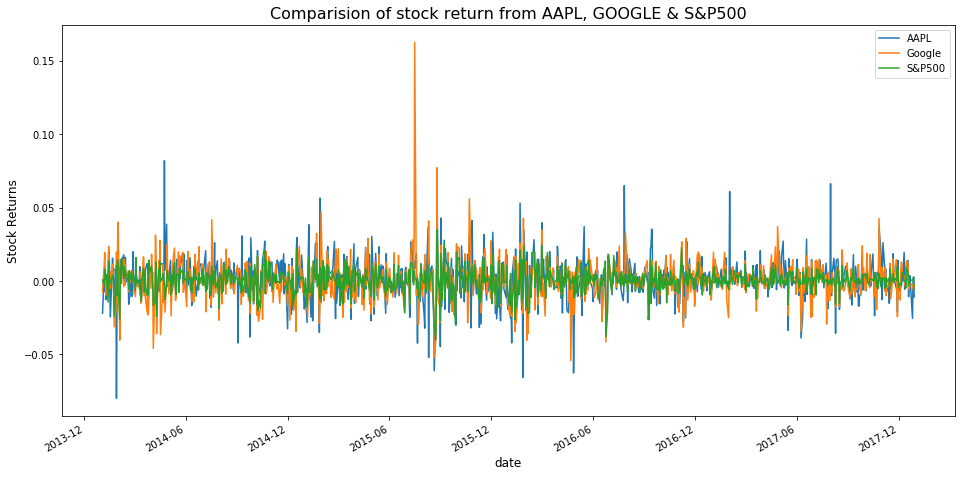

In [21]:
AAPL['stock_return'].plot(label='AAPL', figsize=(16,8))
GOOGL['stock_return'].plot(label='Google')
sNpstocks['stock_return'].plot(label='S&P500')
plt.title('Comparision of stock return from AAPL, GOOGLE & S&P500', fontsize =16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Stock Returns', fontsize=12)
plt.legend()
plt.show()

In [ ]:
sNpstocksd 

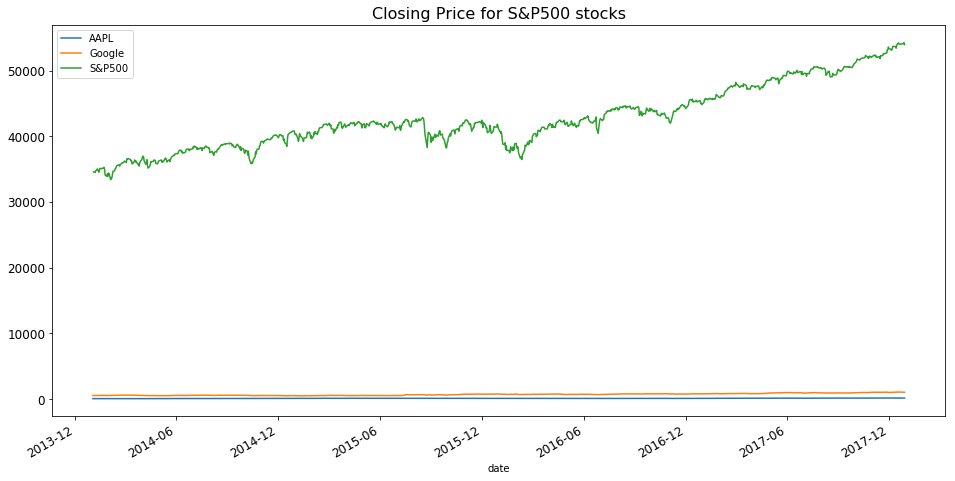

In [22]:
AAPL['close'].plot(label='AAPL', figsize=(16,8), title = 'Volume', fontsize= 12)
GOOGL['close'].plot(label='Google')
sNpstocks['close'].plot(label='S&P500')
plt.legend()
plt.title('Closing Price for S&P500 stocks', fontsize=16)
plt.show()

In [23]:
monthly_annu = sNpstocks['stock_return'].resample('M').std()*np.sqrt(12)

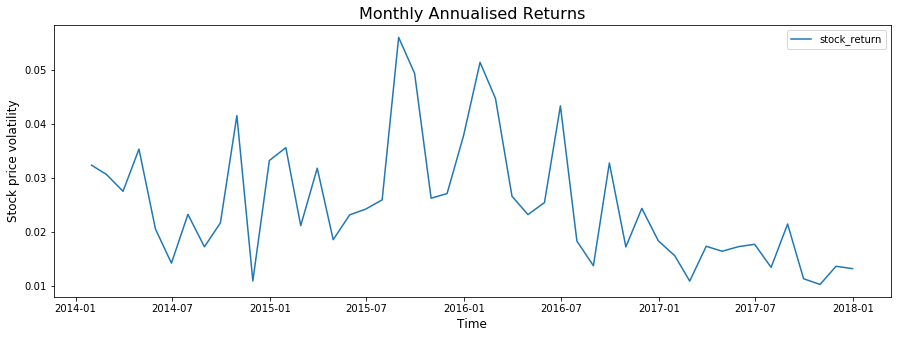

In [24]:
plt.plot(monthly_annu)
plt.legend()
plt.title('Monthly Annualised Returns', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Stock price volatility', fontsize=12)
labs = mpatches.Patch(color='red',alpha=.5, label="stocks returns")
plt.show()

In [26]:
monthly_annu.head(2)

date
2014-01-31    0.032311
2014-02-28    0.030593
Freq: M, Name: stock_return, dtype: float64

In [29]:
# Order the data
# For each year rank each month based on volatility from lowest to highest
rank = monthly_annu.groupby(monthly_annu.index.year).rank()

##  ** ******************************** FINAL AMVR Values ****************************************
#### ** Average the ranks of each month over all years
#### ** Results shows the volatility is highest in january and November.

In [30]:
final = rank.groupby(rank.index.month).mean()
print("\n Volatility Over a Period of :\n{}".format(final)), print('\n Volatility statstics \n{}'.format(final.describe()))


 Volatility Over a Period of :
date
1     9.25
2     5.75
3     8.25
4     6.25
5     5.75
6     6.75
7     4.75
8     7.00
9     7.00
10    5.25
11    5.00
12    7.00
Name: stock_return, dtype: float64

 Volatility statstics 
count    12.000000
mean      6.500000
std       1.331438
min       4.750000
25%       5.625000
50%       6.500000
75%       7.000000
max       9.250000
Name: stock_return, dtype: float64


(None, None)

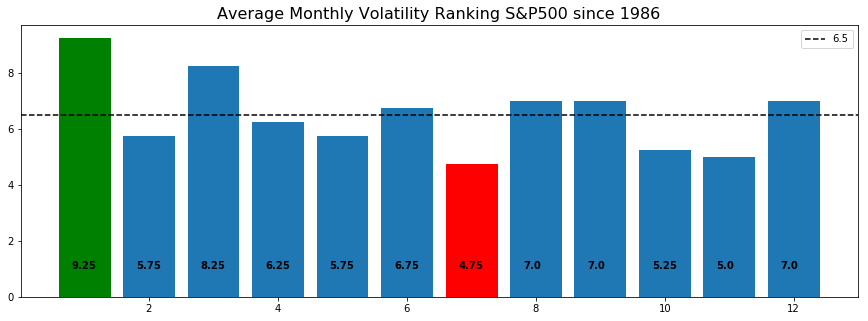

In [31]:
b_plot = plt.bar(final.index,final)
b_plot[0].set_color('g')
b_plot[6].set_color('r')
for i,v in enumerate(round(final,2)):
    plt.text(i+.8,1,str(v), color='black', fontweight='bold')
plt.axhline(final.mean(),ls='--',color='k',label=round(final.mean(),2))
plt.title('Average Monthly Volatility Ranking S&P500 since 1986', fontsize=16)
plt.legend()
plt.show()

In [42]:
dev_from_mean = abs(final-final.mean())
print(dev_from_mean.sort_values())
print('Extreme Jan value: {}'.format(dev_from_mean[1]))
print('Extreme Aug value: {}'.format(dev_from_mean[6]))

date
4     0.25
6     0.25
8     0.50
9     0.50
12    0.50
2     0.75
5     0.75
10    1.25
11    1.50
3     1.75
7     1.75
1     2.75
Name: stock_return, dtype: float64
Extreme Jan value: 2.75
Extreme Aug value: 0.25


## ****Testing Hypothesis:
### H0: S&P stock returns are highly volatile in January month
### H1: S&P stocks returns are not vloatile in January

### **********Simpulation through Resampling**********
#####  * Sampling the data and make the observed effect equally likely amongst all the labels and thus giving us a desired null set.
#####  * For constructing null dataset i.e. with no seasonality , we removed the labels for each month and then shuffle to create the sample
#####  * We did 1000 samples of 12 AMVR , permuting the data labels each time we build the samples.
#### * Test is similar to t-test or ANOVA as we are in the most extreme value, either above or below the mean.

In [32]:
new_df_sim = pd.DataFrame()
highest_only = []

count = 0
n=1000
highest = []
new_df_sim = pd.DataFrame()
for i in range(n):
    daily_return_shuffle = sNpstocks['stock_return'].sample(1006).reset_index(drop=True) #randomly samples the data and removing date index 
    daily_return_shuffle.index = pd.bdate_range(start='2014-01-03', periods=1006) #adding date index {only business days date}
    
    monthly_annu = daily_return_shuffle.resample('M').std()*np.sqrt(12) #sampling over a monh and 
    ranked = monthly_annu.groupby(monthly_annu.index.year).rank() #rank the returns based on year
    sim_final = ranked.groupby(ranked.index.month).mean() #aggregating mean by months.
    new_df_sim = pd.concat([new_df_sim,sim_final],axis=1) #concat the dataframes
    maxi_month = max(sim_final) #
    highest.append(maxi_month)

In [38]:
#calculate absolute deviation in AMVR from the mean
all_months = new_df_sim.values.flatten()
mu_all_months = all_months.mean()
abs_all_months = abs(all_months-mu_all_months)

array([2.63435417, 2.11564583, 1.63435417, ..., 1.05102083, 3.7176875 ,
       0.38435417])

In [41]:
#calculate absolute deviation in highest only AMVR from the mean
mu_highest = np.mean(highest)
abs_highest = [abs(x - mu_all_months) for x in highest]

In [54]:
count=0
jan_value = dev_from_mean.iloc[0]
count= len([i for i in abs_all_months if i> jan_value])
ans = count/len(abs_all_months)        
print('probability that January will produce this exteme value by chance p-val: {}'.format(ans))

probability that January will produce this exteme value by chance: 0.11058333333333334


In [55]:
count=0
for i in abs_highest:
    if i> jan_value:
        count+=1
ans = count/len(abs_highest)        
print('probability that any month will produce this exteme value by chance p-val: {}', ans )

probability that any month will produce this exteme value by chance p-val: {} 0.581


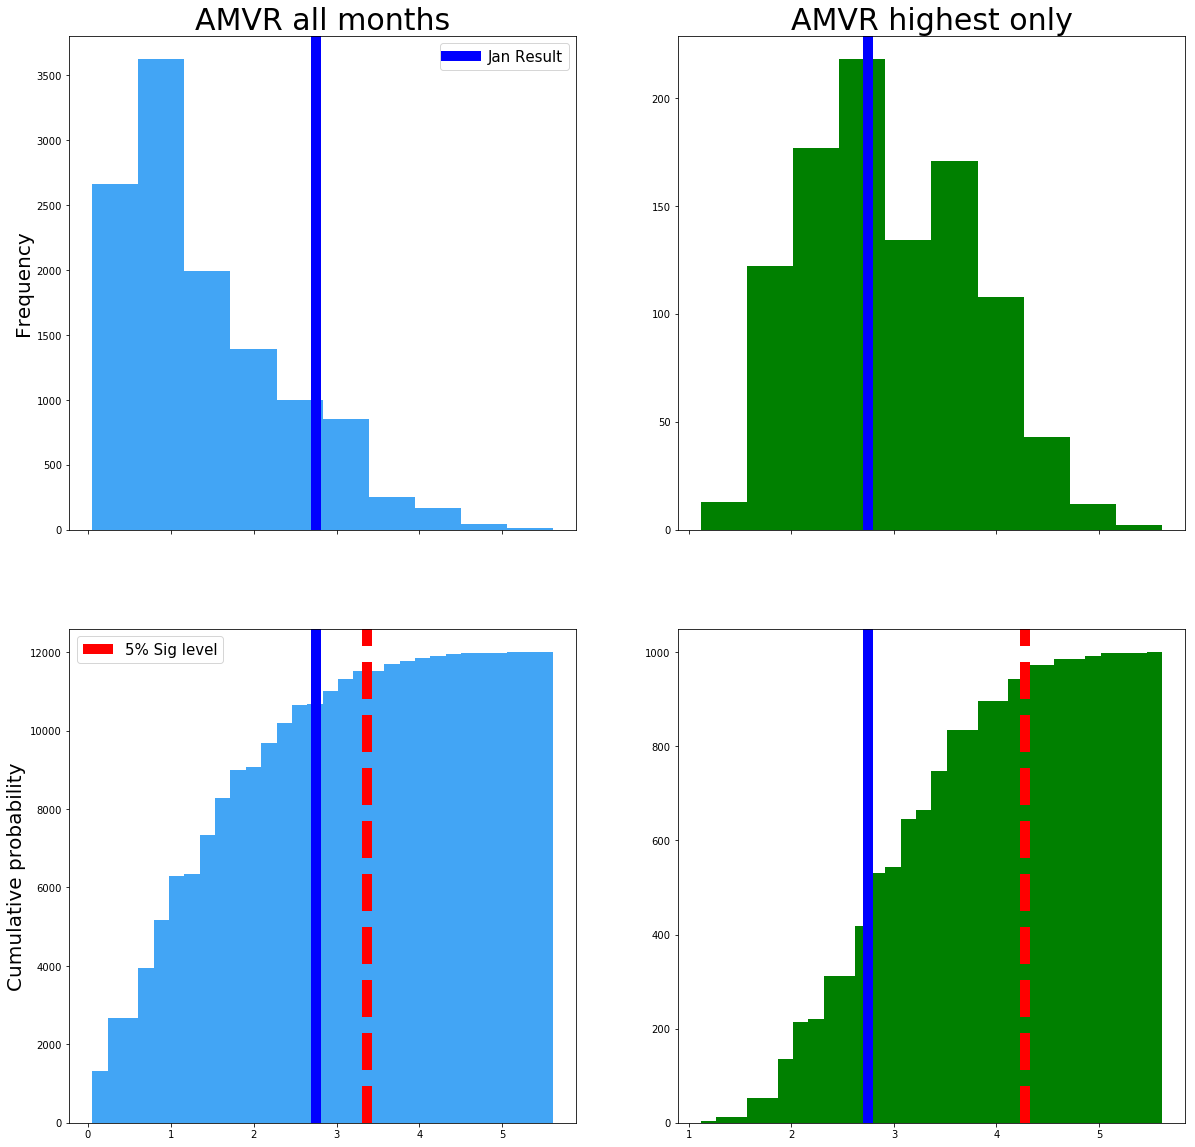

In [62]:
abs_all_months_95 = np.quantile(abs_all_months,.95)
abs_highest_95 = np.quantile(abs_highest,.95)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex='col',figsize=(20,20))


#plot 1
ax1.hist(abs_all_months,histtype='bar',color='#42a5f5')
ax1.set_title('AMVR all months',fontsize=30)
ax1.set_ylabel('Frequency',fontsize=20)
ax3.hist(abs_all_months, histtype='bar',cumulative=True,bins=30,color='#42a5f5')
ax3.set_ylabel('Cumulative probability',fontsize=20)
ax1.axvline(jan_value,color='b',label='Jan Result',lw=10)
ax3.axvline(jan_value,color='b',lw=10)
ax3.axvline(abs_all_months_95,color='r',ls='--',label='5% Sig level',lw=10)


#plot2
ax2.hist(abs_highest,histtype='bar',color='g')
ax2.set_title('AMVR highest only',fontsize=30)
ax2.axvline(jan_value,color='b',lw=10)
ax4.hist(abs_highest,histtype='bar',cumulative=True,bins=30,color='g')
ax4.axvline(jan_value,color='b',lw=10)
ax4.axvline(abs_highest_95,color='r',ls='--',lw=10)

ax1.legend(fontsize=15)
ax3.legend(fontsize=15)

## ONE WAY ANOVA TESTING:
#### Population: monthly stocks returns over the  year from 2014 -2017.
#### Groups: 
#####            * Year 2014
#####            * Year 2015
#####            * Year 2016
#####            * Year 2017

#### Null Hypothesis:H0:  Mean Stocks Returns over the 4 years are same.
#### Alternative Hypothesis: H1: Mean Stocks Returns over the 4 years are different

In [78]:
dat = sNpstocks.groupby([sNpstocks.index.year, sNpstocks.index.month])[['stock_return']].mean()
dat.index.names = ['year', 'month']
dat = dat.reset_index()
del dat.columns.name
print('Year 2014 stats: \n {}'.format(dat[dat['year']==2014][['stock_return']].describe()))
print('Year 2015 stats: \n {}'.format(dat[dat['year']==2015][['stock_return']].describe()))
print('Year 2016 stats: \n {}'.format(dat[dat['year']==2016][['stock_return']].describe()))
print('Year 2017 stats: \n {}'.format(dat[dat['year']==2017][['stock_return']].describe()))

Year 2014 stats: 
        stock_return
count     12.000000
mean       0.000654
std        0.001194
min       -0.001137
25%       -0.000328
50%        0.000659
75%        0.001470
max        0.002971
Year 2015 stats: 
        stock_return
count     12.000000
mean       0.000145
std        0.001635
min       -0.002378
25%       -0.000742
50%       -0.000197
75%        0.000829
max        0.003375
Year 2016 stats: 
        stock_return
count     12.000000
mean       0.000350
std        0.001580
min       -0.002966
25%       -0.000050
50%        0.000248
75%        0.001146
max        0.002960
Year 2017 stats: 
        stock_return
count     12.000000
mean       0.000777
std        0.000613
min       -0.000268
25%        0.000324
50%        0.000900
75%        0.001060
max        0.001951


## Applying one way ANOVA:
#### Test for normality/variance criteria:

******** 
#### Assumptions for Normality/Variance criteria:
####   ** Each group compared should come from a population following the normal distribution.
####   ** Variance criterion: (or homogenity of variances): samples should come from population with same variance
####   ** Performance(the dependent variable) in each sample should not be affected by the conditions in other samples.


In [62]:
stats.shapiro(dat[dat['year']==2014][['stock_return']]), stats.shapiro(dat[dat['year']==2015][['stock_return']]), \
stats.shapiro(dat[dat['year']==2016][['stock_return']]), stats.shapiro(dat[dat['year']==2017][['stock_return']])

((0.9692925214767456, 0.9032529592514038),
 (0.9390404224395752, 0.48574158549308777),
 (0.9522083401679993, 0.6694608330726624),
 (0.971974790096283, 0.9303495287895203))

#### ** All p values are greater than 0.05 therefore we fail to reject the null hypothesis. Hence we colnclude that samples comes from the population that follow normal distribution.

In [74]:
print(stats.levene(dat[dat['year']==2014].stock_return, dat[dat['year']==2015].stock_return, \
                   dat[dat['year']==2016].stock_return, dat[dat['year']==2017].stock_return))

LeveneResult(statistic=1.7104596317701426, pvalue=0.17868228221251206)


#### ** The p value is greater than 0.05, therefore we fail to reject the null hypothesis. Hence we conclude that samples comes from population with same variance.

In [75]:
mod = ols('stock_return~year', data=dat).fit()
anova_tab = sm.stats.anova_lm(mod, typ=2)
print(anova_tab)

                sum_sq    df         F    PR(>F)
year      1.982880e-07   1.0  0.114797  0.736289
Residual  7.945544e-05  46.0       NaN       NaN


#### Interpretation of Results:
#### CONCLUSION: Hence with high p-value we fail to reject Null Hypothesis that yearly return from 2014, 2016, 2017, 2018 are same. 
#### ** Hence p > 0.05, we state that we have a main interaction effect.  This simply identifies that between the group comparision identifies statstically signinficant differences. 
#### ** Hence we can also apply Tukey's Test and Duncan's Test to test whether the groups comparision 

In [76]:
mc = MultiComparison(dat['stock_return'], dat['year'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 2014   2015  -0.0005  -0.0019 0.0009 False 
 2014   2016  -0.0003  -0.0017 0.0011 False 
 2014   2017   0.0001  -0.0013 0.0016 False 
 2015   2016   0.0002  -0.0012 0.0016 False 
 2015   2017   0.0006  -0.0008 0.0021 False 
 2016   2017   0.0004   -0.001 0.0019 False 
--------------------------------------------
